# 单模型分类器

In [1]:
import h5py
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import *
from keras.callbacks import *
import matplotlib.pyplot as plt
import os

np.random.seed(2018)


/home/wson/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plot_history(history, model_name):
    # list all data in history
    # print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('%s accuracy'%model_name)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('%s loss'%model_name)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## 读取特征数据

* 使用80%数据作为训练集，20%数据作为验证集

In [3]:
def read_feature(model_name: str):
    h5_file = "feature_%s.h5"%model_name

    with h5py.File(h5_file, 'r') as h:
        X_pretrain = np.array(h['pretrain'])
        y_pretrain = np.array(h['pretrain_label'])
        X_finetune = np.array(h['finetune'])
        y_finetune = np.array(h['finetune_label'])
        X_val = np.array(h['val'])
        y_val = np.array(h['val_label'])
        X_test = np.array(h['test'])

    X_train = np.concatenate((X_pretrain, X_finetune), axis=0)
    y_train = np.concatenate((y_pretrain, y_finetune), axis=0)

    X_train, y_train = shuffle(X_train, y_train)
    
    return X_train, y_train, X_val, y_val, X_test


## 构建分类器

In [4]:
def build_model(input_shape, drop_prob: float, lr=1e-2, decay=0):
    input_tensor = Input(input_shape)
    x = Dropout(drop_prob)(input_tensor)
    x = Dense(1, activation='sigmoid', name='top_sigmoid')(x)
    model = Model(input_tensor, x)

    opt = optimizers.Adam(lr=lr, decay=decay)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

### InceptionV3

In [5]:
model_name = 'InceptionV3'
X_train, y_train, X_val, y_val, X_test = read_feature(model_name)
print(X_train.shape, X_val.shape)

(19916, 2048) (4979, 2048)


* 调整参数

In [6]:
model = build_model(X_train.shape[1:], 0.5, lr=1e-3, decay=1e-6)

In [7]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
             ModelCheckpoint(filepath='top_model_%s.h5'%model_name, monitor='val_loss', verbose=0, save_best_only=True)]

history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val), callbacks=callbacks)

Train on 19916 samples, validate on 4979 samples
Epoch 1/30
19916/19916 [==============================] - 3s 148us/step - loss: 0.1253 - acc: 0.9610 - val_loss: 0.0347 - val_acc: 0.9918
Epoch 2/30
19916/19916 [==============================] - 1s 33us/step - loss: 0.0338 - acc: 0.9922 - val_loss: 0.0216 - val_acc: 0.9952
Epoch 3/30
19916/19916 [==============================] - 1s 43us/step - loss: 0.0259 - acc: 0.9931 - val_loss: 0.0189 - val_acc: 0.9948
Epoch 4/30
19916/19916 [==============================] - 1s 32us/step - loss: 0.0222 - acc: 0.9935 - val_loss: 0.0176 - val_acc: 0.9950
Epoch 5/30
19916/19916 [==============================] - 1s 30us/step - loss: 0.0210 - acc: 0.9941 - val_loss: 0.0157 - val_acc: 0.9962
Epoch 6/30
19916/19916 [==============================] - 1s 31us/step - loss: 0.0189 - acc: 0.9943 - val_loss: 0.0145 - val_acc: 0.9964
Epoch 7/30
19916/19916 [==============================] - 1s 38us/step - loss: 0.0189 - acc: 0.9940 - val_loss: 0.0138 - val_acc

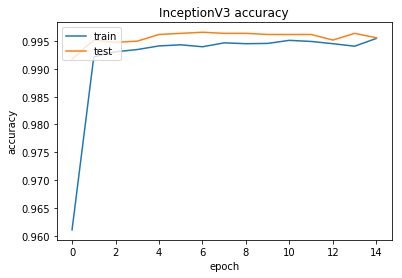

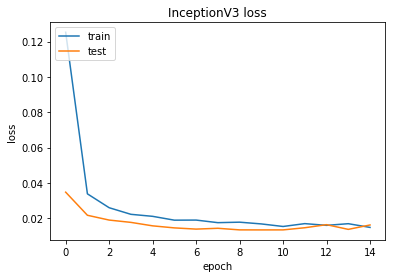

In [8]:
plot_history(history, model_name)

### Xception

In [103]:
model_name = 'Xception'
X_train, y_train, X_val, y_val, X_test = read_feature(model_name)
print(X_train.shape, X_val.shape)

(19916, 2048) (4979, 2048)


* 调整参数

In [109]:
model = build_model(X_train.shape[1:], 0.6, lr=1e-3, decay=1e-6)

In [110]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
             ModelCheckpoint(filepath='top_model_%s.h5'%model_name, monitor='val_loss', verbose=0, save_best_only=True)]

history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val), callbacks=callbacks)

Train on 19916 samples, validate on 4979 samples
Epoch 1/30
19916/19916 [==============================] - 1s 73us/step - loss: 0.1409 - acc: 0.9727 - val_loss: 0.0413 - val_acc: 0.9938
Epoch 2/30
19916/19916 [==============================] - 1s 44us/step - loss: 0.0395 - acc: 0.9927 - val_loss: 0.0257 - val_acc: 0.9942
Epoch 3/30
19916/19916 [==============================] - 1s 49us/step - loss: 0.0284 - acc: 0.9939 - val_loss: 0.0203 - val_acc: 0.9948
Epoch 4/30
19916/19916 [==============================] - 1s 51us/step - loss: 0.0241 - acc: 0.9941 - val_loss: 0.0177 - val_acc: 0.9948
Epoch 5/30
19916/19916 [==============================] - 1s 52us/step - loss: 0.0215 - acc: 0.9949 - val_loss: 0.0162 - val_acc: 0.9952
Epoch 6/30
19916/19916 [==============================] - 1s 54us/step - loss: 0.0202 - acc: 0.9948 - val_loss: 0.0153 - val_acc: 0.9958
Epoch 7/30
19916/19916 [==============================] - 1s 45us/step - loss: 0.0186 - acc: 0.9950 - val_loss: 0.0145 - val_acc:

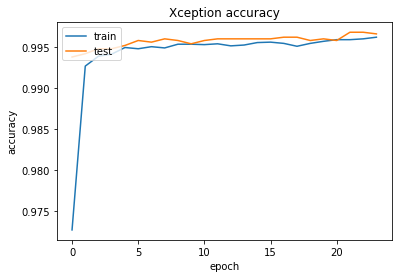

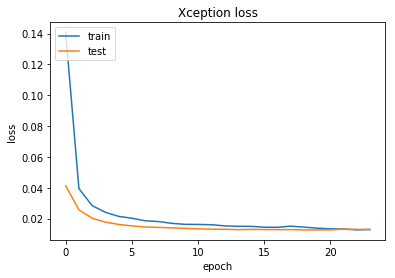

In [111]:
plot_history(history, model_name)

### InceptionResNetV2

In [9]:
model_name = 'InceptionResNetV2'
X_train, y_train, X_val, y_val, X_test = read_feature(model_name)
print(X_train.shape, X_val.shape)

(19916, 1536) (4979, 1536)


* 调整参数

In [17]:
model = build_model(X_train.shape[1:], 0.2, lr=1e-3, decay=1e-6)

In [18]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
             ModelCheckpoint(filepath='top_model_%s.h5'%model_name, monitor='val_loss', verbose=0, save_best_only=True)]

history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val), callbacks=callbacks)

Train on 19916 samples, validate on 4979 samples
Epoch 1/30
19916/19916 [==============================] - 1s 58us/step - loss: 0.0932 - acc: 0.9856 - val_loss: 0.0294 - val_acc: 0.9952
Epoch 2/30
19916/19916 [==============================] - 1s 48us/step - loss: 0.0261 - acc: 0.9948 - val_loss: 0.0197 - val_acc: 0.9964
Epoch 3/30
19916/19916 [==============================] - 1s 40us/step - loss: 0.0202 - acc: 0.9952 - val_loss: 0.0163 - val_acc: 0.9970
Epoch 4/30
19916/19916 [==============================] - 1s 39us/step - loss: 0.0179 - acc: 0.9956 - val_loss: 0.0149 - val_acc: 0.9970
Epoch 5/30
19916/19916 [==============================] - 1s 39us/step - loss: 0.0162 - acc: 0.9959 - val_loss: 0.0136 - val_acc: 0.9968
Epoch 6/30
19916/19916 [==============================] - 1s 39us/step - loss: 0.0152 - acc: 0.9962 - val_loss: 0.0129 - val_acc: 0.9974
Epoch 7/30
19916/19916 [==============================] - 1s 44us/step - loss: 0.0145 - acc: 0.9964 - val_loss: 0.0124 - val_acc:

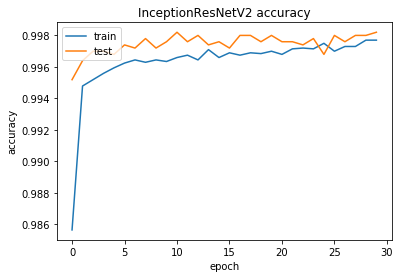

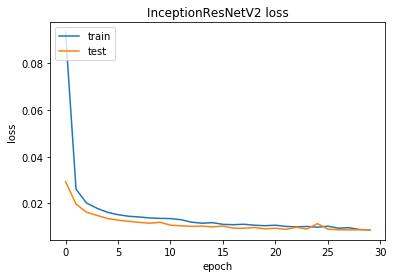

In [19]:
plot_history(history, model_name)

## 预测测试集

In [112]:
model.load_weights('top_model_%s.h5'%model_name)

In [113]:
y_pred = model.predict(X_test, verbose=1)

12500/12500 [==============================] - 0s 36us/step


In [114]:
y_pred_clip = y_pred.clip(min=0.005, max=0.995)

In [115]:
df = pd.read_csv("sampleSubmission.csv")

image_size = (299, 299)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("test", image_size, shuffle=False, 
                                         batch_size=64, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind(os.sep)+1:fname.rfind('.')])
    df.loc[index-1, ['label']] = y_pred_clip[i]

df.to_csv('pred.csv', index=None)
df.head(10)

Found 12500 images belonging to 1 classes.


,id,label
0,1,0.995
1,2,0.995
2,3,0.995
3,4,0.995
4,5,0.005
5,6,0.005
6,7,0.005
7,8,0.005
8,9,0.005
9,10,0.005
